# Investment Risk Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyfolio as pf
import math
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

C:\Users\Tin Hang\Anaconda3\lib\site-packages\pyfolio\pos.py:28: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  ' to position notionals.'


In [2]:
# input
# Water Stock
title = 'Stock'
symbols = ['AMD','SPY']
start = '2021-01-01'
end = '2021-06-18'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
0 years


In [5]:
number_of_years = delta.years

In [6]:
months = (d2.year - d1.year) * 12 + (d2.month - d1.month)
months

5

In [7]:
days = (df.index[-1] - df.index[0]).days
days

164

In [8]:
df.head()

,AMD,SPY
Date,,
2021-01-04,92.300003,367.586090
2021-01-05,92.769997,370.117767
2021-01-06,90.330002,372.330505
2021-01-07,95.160004,377.862427
2021-01-08,94.580002,380.015381


In [9]:
df.tail()

,AMD,SPY
Date,,
2021-06-11,81.309998,424.309998
2021-06-14,81.550003,425.260010
2021-06-15,80.470001,424.480011
2021-06-16,80.110001,422.109985
2021-06-17,84.559998,421.970001


In [10]:
amd = df["AMD"].pct_change()[1:]
spy = df["SPY"].pct_change()[1:]

In [11]:
pf.show_perf_stats(amd, spy)

Start date,2021-01-05
End date,2021-06-17
Total months,5
,Backtest
Annual return,-17.6%
Cumulative returns,-8.4%
Annual volatility,39.6%
Sharpe ratio,-0.29
Calmar ratio,-0.71
Stability,0.54
Max drawdown,-24.8%


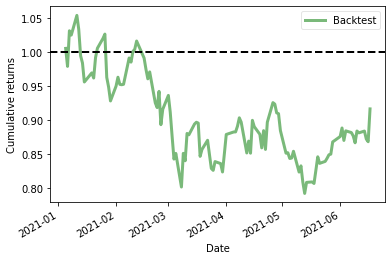

In [12]:
pf.plot_rolling_returns(amd)
plt.show()

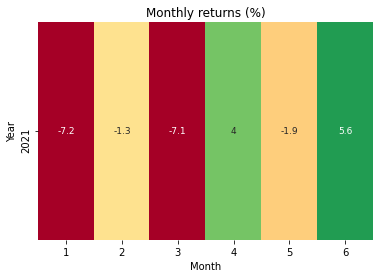

In [13]:
pf.plot_monthly_returns_heatmap(amd)
plt.show()

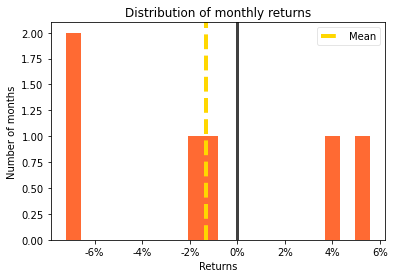

In [14]:
pf.plot_monthly_returns_dist(amd)
plt.show()

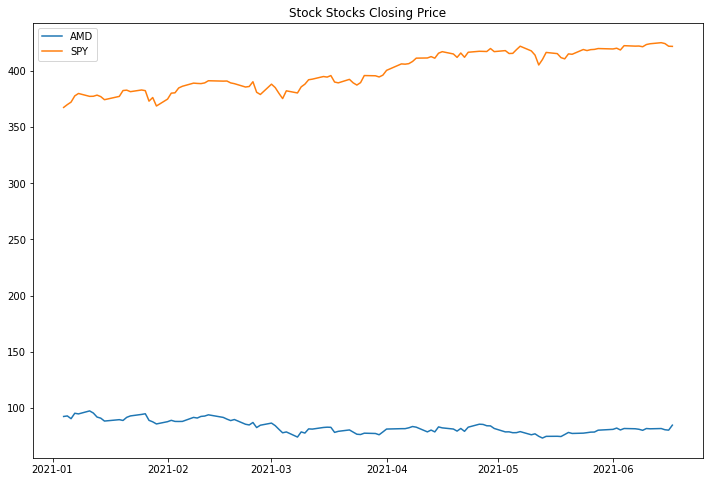

In [15]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title(title + ' Stocks Closing Price')
plt.legend(labels=df.columns)

In [16]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

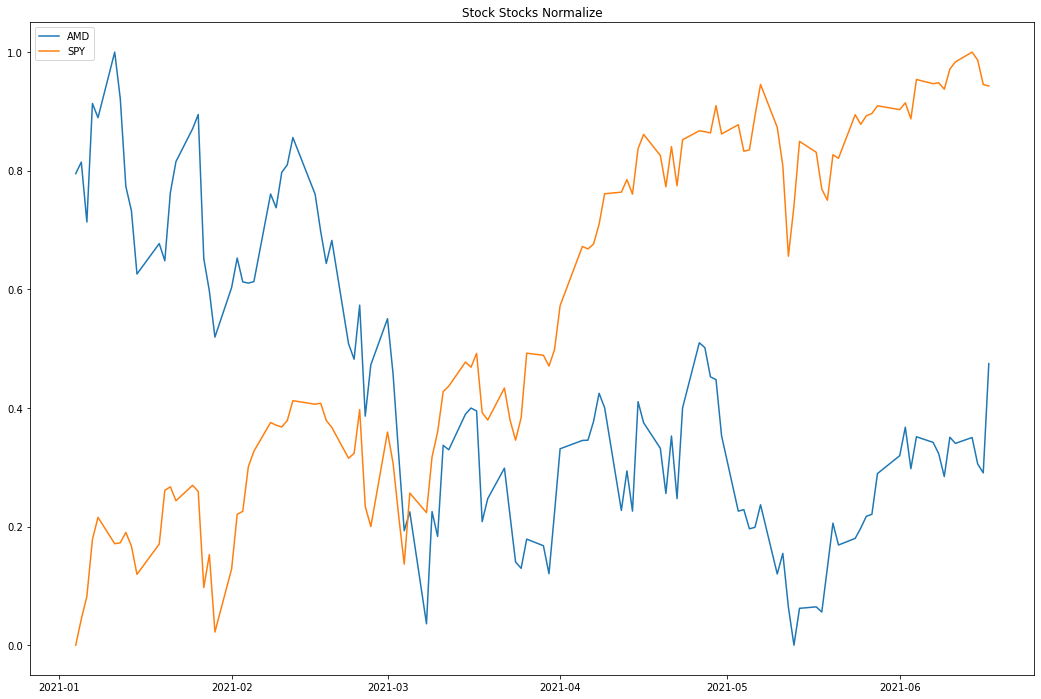

In [17]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(title + ' Stocks Normalize')
plt.legend(labels=normalize.columns)

In [18]:
stock_rets = df.pct_change().dropna()

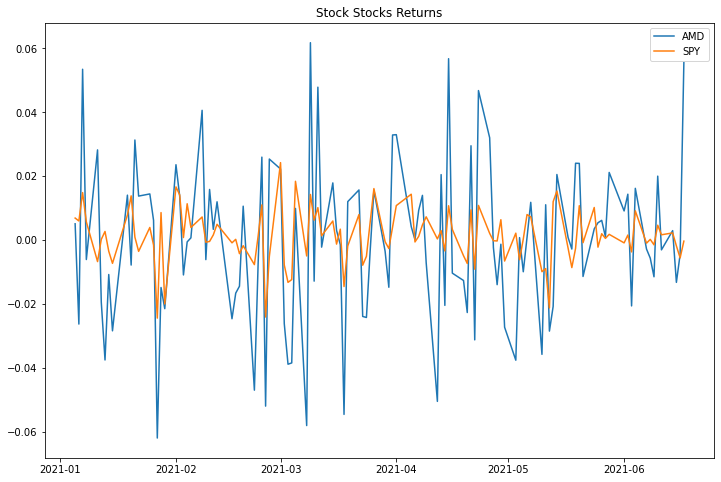

In [19]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title(title +' Stocks Returns')
plt.legend(labels=stock_rets.columns)

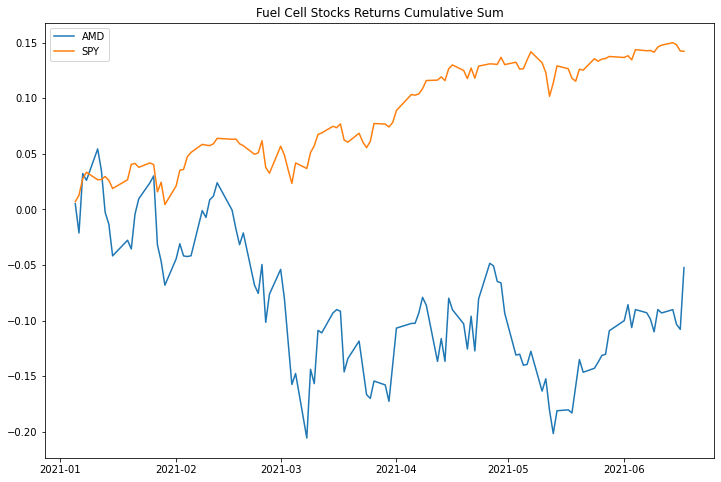

In [20]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title('Fuel Cell Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

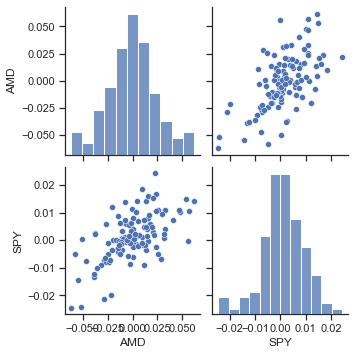

In [21]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

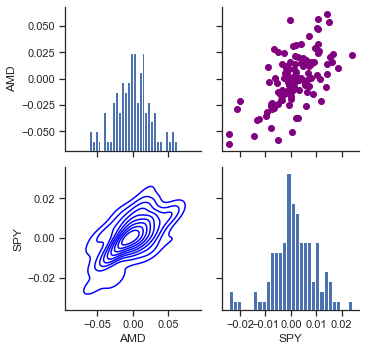

In [22]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

<AxesSubplot:>

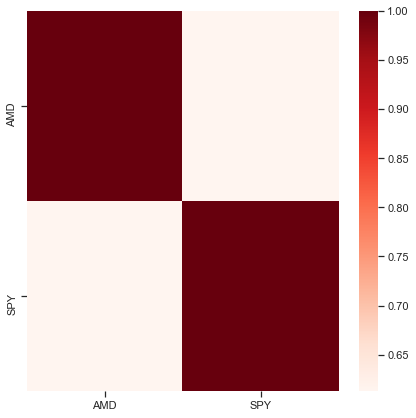

In [23]:
plt.figure(figsize=(7,7))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

<AxesSubplot:>

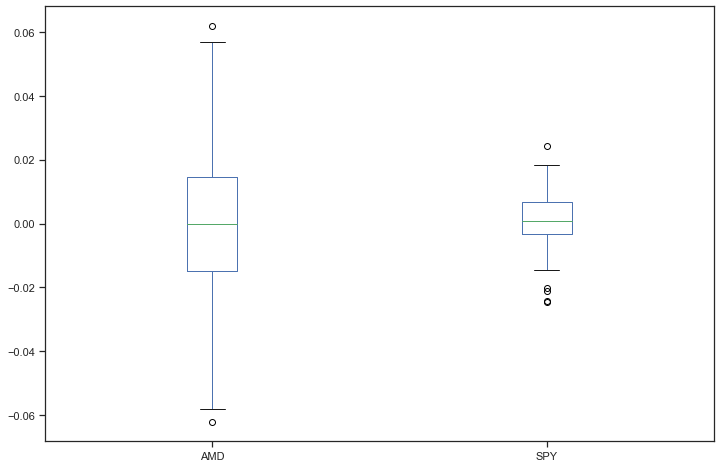

In [24]:
# Box plot
stock_rets.plot(kind='box',figsize=(12,8))

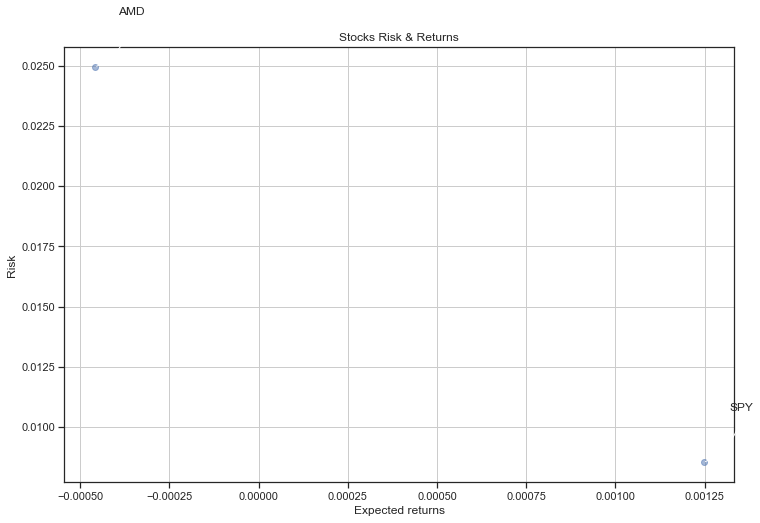

In [25]:
rets = stock_rets.dropna()

plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

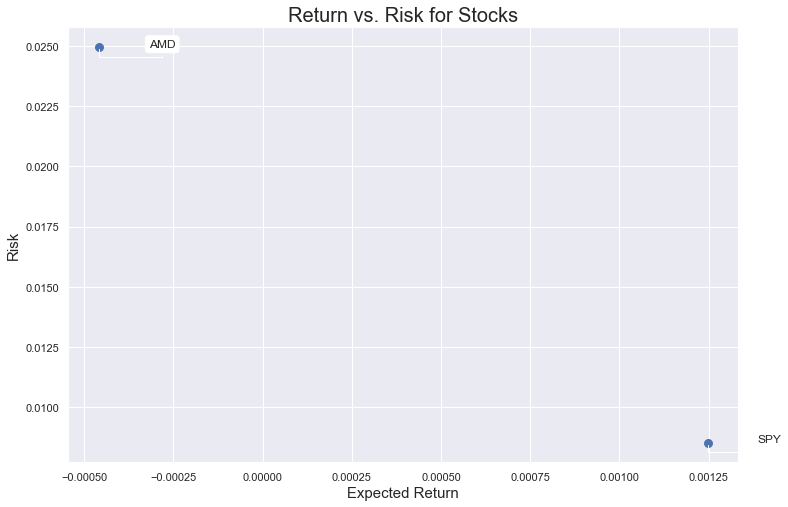

In [26]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [27]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

SPY  SPY    1.000000
AMD  AMD    1.000000
SPY  AMD    0.612799
AMD  SPY    0.612799
dtype: float64

In [28]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,AMD,SPY
Date,,
2021-01-05,0.541903,0.643536
2021-01-06,0.288256,0.624867
2021-01-07,0.932782,0.807261
2021-01-08,0.451517,0.619100
2021-01-11,0.728849,0.363587


In [29]:
Normalized_Value.corr()

,AMD,SPY
AMD,1.000000,0.612799
SPY,0.612799,1.000000


In [30]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

SPY  SPY    1.000000
AMD  AMD    1.000000
SPY  AMD    0.612799
AMD  SPY    0.612799
dtype: float64

In [31]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
AMD   -0.000459
SPY    0.001247
dtype: float64
--------------------------------------------------
Stock risks:
AMD    0.024947
SPY    0.008532
dtype: float64


In [32]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
AMD,-0.000459,0.024947
SPY,0.001247,0.008532


In [33]:
table.sort_values(by='Risk')

,Returns,Risk
SPY,0.001247,0.008532
AMD,-0.000459,0.024947


In [34]:
rf = 0.001
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
AMD,-0.000459,0.024947,-0.058487
SPY,0.001247,0.008532,0.028970


In [35]:
table['Max Returns'] = rets.max()

In [36]:
table['Min Returns'] = rets.min()

In [37]:
table['Median Returns'] = rets.median()

In [38]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
AMD,-0.000459,0.024947,-0.058487,0.06179,-0.061979,-0.000223,5.554858
SPY,0.001247,0.008532,0.028970,0.02424,-0.024440,0.000849,-0.033163


In [39]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days
AMD,-0.000459,0.024947,-0.058487,0.06179,-0.061979,-0.000223,5.554858,0.000330
SPY,0.001247,0.008532,0.028970,0.02424,-0.024440,0.000849,-0.033163,-0.000002


In [40]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
AMD,-0.000459,0.024947,-0.058487,0.06179,-0.061979,-0.000223,5.554858,0.000330,-0.125916
SPY,0.001247,0.008532,0.028970,0.02424,-0.024440,0.000849,-0.033163,-0.000002,0.236164


In [41]:
table.sort_values(by='Average Return Days')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
SPY,0.001247,0.008532,0.028970,0.02424,-0.024440,0.000849,-0.033163,-0.000002,0.236164
AMD,-0.000459,0.024947,-0.058487,0.06179,-0.061979,-0.000223,5.554858,0.000330,-0.125916


In [42]:
table['var_99'] = round((rets).quantile(0.01), 3)
table['var_95'] = round((rets).quantile(0.05), 3)

In [43]:
table.sort_values(by='Returns')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR,var_99,var_95
AMD,-0.000459,0.024947,-0.058487,0.06179,-0.061979,-0.000223,5.554858,0.000330,-0.125916,-0.058,-0.042
SPY,0.001247,0.008532,0.028970,0.02424,-0.024440,0.000849,-0.033163,-0.000002,0.236164,-0.024,-0.013


In [44]:
# Pure Profit Score
df = df.dropna()
t = np.arange(0, df.shape[0]).reshape(-1, 1)
regression = LinearRegression().fit(t, df)
r_squared = regression.score(t, df)
table['PPS'] = table['CAGR'] * r_squared

In [45]:
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR,var_99,var_95,PPS
AMD,-0.000459,0.024947,-0.058487,0.06179,-0.061979,-0.000223,5.554858,0.000330,-0.125916,-0.058,-0.042,-0.091019
SPY,0.001247,0.008532,0.028970,0.02424,-0.024440,0.000849,-0.033163,-0.000002,0.236164,-0.024,-0.013,0.170712
